# FUNCTIONS

In [4]:
#Import necessary built-in modules and functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy.linalg import eig

In [5]:
#Function to calculate the values of the steady states
def steady_states(glc, phi, r, d):
    ss_pep = (phi*glc + (glc*phi**2)/d) / (phi - r + 1 + d - (phi*(2*r - 1 - d))/d)
    ss_pyr = (phi*glc + ss_pep*(2*r - 1 - d))/d
    ss_oaa = ss_pep/phi
    print("pep steady state = %4.3f; pyr steady state = %4.3f; oaa steady state = %4.3f" % (ss_pep, ss_pyr, ss_oaa))

In [6]:
#ODE function to compute the 3 provided ODEs
def ode3(x, t, glc, phi, r, d):
    pep = x[0]
    pyr = x[1]
    oaa = x[2]
    
    dpepdt = phi*(glc - pep + pyr + r*oaa) - (1+d)*pep
    dpyrdt = phi*(pep - pyr + r*oaa) - d*pyr
    doaadt = pep - phi*oaa
    
    return [dpepdt, dpyrdt, doaadt]

#Function for computing the solution of the 3 ODEs system and their plotting
def solveODE3(parameters, initial_conditions, timelimit, title):
    t = np.linspace(0, timelimit, 2000)
    solution = odeint(ode3, initial_conditions, t, args = parameters)
    pep = solution[:,0]
    pyr = solution[:,1]
    oaa = solution[:,2]
    plt.plot(t, pep, color = "b")
    plt.plot(t, pyr, color = "orange")
    plt.plot(t, oaa, label = "oaa", color = "g")
    plt.ylabel("Concentration (mM)")
    plt.xlabel("Time (h)")
    plt.title(title)

In [7]:
#ODE function to compute the 2 calculated ODEs under the assumption that OAA is at its steady state
def ode2(x, t, glc, phi, r, d):
    pep = x[0]
    pyr = x[1]
    
    dpepdt = phi*(glc - pep + pyr + r*pep/phi) - (1+d)*pep
    dpyrdt = phi*(pep - pyr + r*pep/phi) - d*pyr
    
    return [dpepdt, dpyrdt]

#Function for computing the solution of the 2 ODEs system and their plotting
def solveODE2(parameters, initial_conditions, timelimit, title):
    t = np.linspace(0, timelimit, 2000)
    solution = odeint(ode2, initial_conditions, t, args = parameters)
    pep = solution[:,0]
    pyr = solution[:,1]
    plt.plot(t, pep, color = "b")
    plt.plot(t, pyr, color = "orange")
    plt.ylabel("Concentration (mM)")
    plt.xlabel("Time (h)")
    plt.title(title)

In [8]:
#Customed functions for plotting phase portraits (pplane) and nullclines    
def pplane(ode, pars, xlim, ylim, npointsx = 13, npointsy = 13, rescale_arrows = True):
    x_range = np.linspace(xlim[0],xlim[1],npointsx)
    y_range = np.linspace(ylim[0],ylim[1],npointsy)
    X,Y = np.meshgrid(x_range,y_range)
    
    dXdt = ode([X,Y],0,*pars)

    U = np.copy(dXdt[0])
    V = np.copy(dXdt[1])
    if rescale_arrows:
        length = np.sqrt(U**2 + V**2)
        with np.errstate(divide='ignore', invalid='ignore'):
            U /= length
            V /= length

    plt.quiver(X,Y,U,V, angles = 'xy', scale_units = 'xy', pivot = 'mid')

def nullclines(ode, pars, xlim, ylim, labels = ['Nullcline x','Nullcline y'], npointsx = 100, npointsy = 100):
    x_range = np.linspace(xlim[0],xlim[1],npointsx)
    y_range = np.linspace(ylim[0],ylim[1],npointsy)
    X,Y = np.meshgrid(x_range,y_range)
    
    dXdt = ode([X,Y],0,*pars)
    dxdt = dXdt[0]
    dydt = dXdt[1]
    
    C = plt.contour(X,Y,dxdt, levels = [0])
    C.collections[0].set_label(labels[0])
    for collection in C.collections:
        collection.set_color('cyan')
        
    C = plt.contour(X,Y,dydt, levels = [0])
    C.collections[0].set_label(labels[1])
    for collection in C.collections:
        collection.set_color('red')
        collection.set_linestyle('--')

In [9]:
#Function to add solutions in the phase portrait
def phase_portrait_solutions(parameters, initial_conditions):
    t = np.linspace(0, 100, 2000)
    solution = odeint(ode2, initial_conditions, t, args = parameters)
    pep = solution[:,0]
    pyr = solution[:,1]
    plt.plot(pep, pyr, color = "b")

In [10]:
#Function that returns the steady state of the variables so they can be recorded for every parameter 
#value to make the bifurcation plo
def bifurcation(parameters, initial_conditions):
    t = np.linspace(0, 100, 2000)
    solution = odeint(ode2, initial_conditions, t, args = parameters)
    pep = solution[:,0]
    pyr = solution[:,1]
    return (pep[-1], pyr[-1])

In [11]:
## Time-dependent glucose ##
#ODE function to compute the time-dependant glucose ODE plus the previous ones
def ode_glc(x, t, phi, r, d):
    pep = x[0]
    pyr = x[1]
    glc = x[2]
    
    dglcdt = 1.1*glc
    dpepdt = phi*(glc - pep + pyr + r*pep/phi) - (1+d)*pep
    dpyrdt = phi*(pep - pyr + r*pep/phi) - d*pyr
    
    return [dpepdt, dpyrdt, dglcdt]

#Function for computing the solution of the ODEs system and their plotting
def solveODE_glc(parameters, initial_conditions):
    t = np.linspace(0, 10, 2000)
    solution = odeint(ode_glc, initial_conditions, t, args = parameters)
    pep = solution[:,0]
    pyr = solution[:,1]
    glc = solution[:,2]
    plt.plot(t, pep, color = "b")
    plt.plot(t, pyr, color = "orange")
    plt.plot(t, glc, color = "r")
    plt.ylabel("Concentration (mM)")
    plt.xlabel("Time (h)")
    plt.ylim(0,0.5)

# GROWTH  STATE

In [12]:
#Parameter values associated with the growth state
glc, phi, r, d = 1, 0.1, 0.1, 10**-8
parameters = (glc, phi, r, d)

In [13]:
#Calculate the values of the steady states
steady_states(glc, phi, r, d)  

pep steady state = 0.125; pyr steady state = 0.250; oaa steady state = 1.250


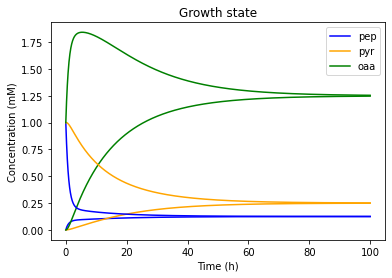

In [14]:
#Plotting two different set of solutions for the ODE system of 3 equations
solveODE3(parameters = parameters, initial_conditions = (0,0,0), timelimit = 100, title = "Growth state")
solveODE3(parameters = parameters, initial_conditions = (1,1,1), timelimit = 100, title = "Growth state")
plt.legend(("pep", "pyr", "oaa"))
plt.show()

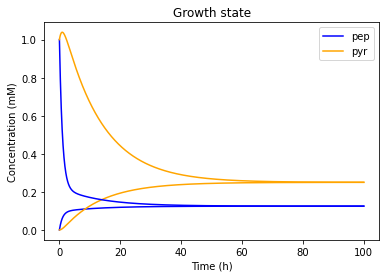

In [15]:
#Plotting two different set of solutions for the ODE system of 2 equations
solveODE2(parameters = parameters, initial_conditions = (0,0), timelimit = 100, title = "Growth state")
solveODE2(parameters = parameters, initial_conditions = (1,1), timelimit = 100, title = "Growth state")
plt.legend(("pep", "pyr"))
plt.show()

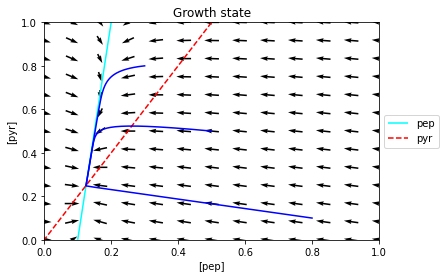

In [16]:
## Plotting the phase portrait with the nullclines and solutions ##

#Adjust the limits of the phase portrait
xlim = (-0,1)
ylim = (-0,1)

#Plot the phase portrait
pplane(ode2, pars = parameters, xlim = xlim, ylim = ylim)

#Add labels
plt.title("Growth state")
plt.xlabel("[pep]")
plt.ylabel("[pyr]")

#Plot nullclines
nullclines(ode2, pars = parameters, xlim = xlim, ylim = ylim, labels = ['pep','pyr'])

#Adjust the position of the legend table
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Plot solutions
phase_portrait_solutions(parameters = parameters, initial_conditions = (0.5,0.5))
phase_portrait_solutions(parameters = parameters, initial_conditions = (0.3,0.8))
phase_portrait_solutions(parameters = parameters, initial_conditions = (0.8,0.1))

In [17]:
#Calculation of eigenvalues
a = -phi+r-1-d
b = phi
c = phi + r
d = -phi-d

matrix = np.array([[a, b], 
                  [c, d]])
eigenvalues = eig(matrix)[0]
print('Eigenvalues =', eigenvalues)

Eigenvalues = [-1.02169907 -0.07830095]


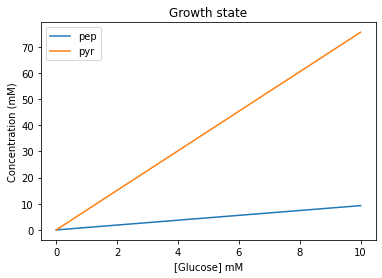

In [18]:
## Bifurcation plot ##

#Possible values of the parameter
glc = np.linspace(0,10,100)

#Add to a list the steady states of the variables for every value of the parameter
pep, pyr = [], []
for glc_value in glc:
    pep.append(bifurcation(parameters = (glc_value, phi, r, d), initial_conditions = (0,0))[0])
    pyr.append(bifurcation(parameters = (glc_value, phi, r, d), initial_conditions = (0,0))[1])

#Plot one variable against the other
plt.plot(glc, pep, label = "pep")
plt.plot(glc, pyr, label = "pyr")
plt.ylabel("Concentration (mM)")
plt.xlabel("[Glucose] mM")
plt.title("Growth state")
plt.legend()
plt.show()

# DORMANT STATE

In [19]:
#Parameter values associated with the growth state
glc, phi, r, d = 1, 10**-8, 0.1, 10**-8
parameters = (glc, phi, r, d)

In [20]:
#Calculate the values of the steady states
steady_states(glc, phi, r, d)  

pep steady state = 0.000; pyr steady state = 0.059; oaa steady state = 1.176


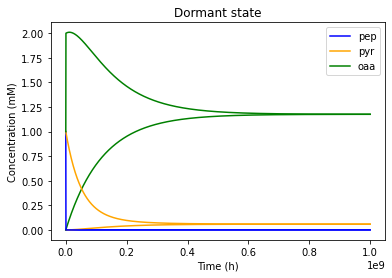

In [21]:
#Plotting two different set of solutions for the ODE system of 3 equations
solveODE3(parameters = parameters, initial_conditions = (0,0,0), timelimit = 1000000000, title = "Dormant state")
solveODE3(parameters = parameters, initial_conditions = (1,1,1), timelimit = 1000000000, title = "Dormant state")
plt.legend(("pep", "pyr", "oaa"))
plt.show()

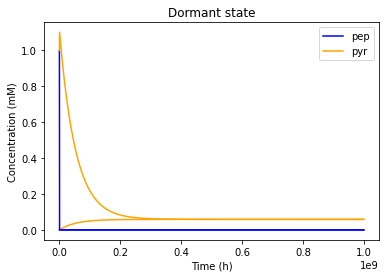

In [22]:
#Plotting two different set of solutions for the ODE system of 2 equations
solveODE2(parameters = parameters, initial_conditions = (0,0), timelimit = 1000000000, title = "Dormant state")
solveODE2(parameters = parameters, initial_conditions = (1,1), timelimit = 1000000000, title = "Dormant state")
plt.legend(("pep", "pyr"))
plt.show()

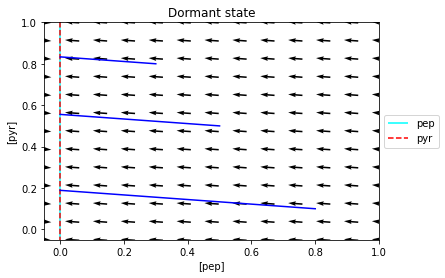

In [23]:
## Plotting the phase portrait with the nullclines and solutions ##

#Adjust the limits of the phase portrait
xlim = (-0.05,1)
ylim = (-0.05,1)

#Plot the phase portrait
pplane(ode2, pars = parameters, xlim = xlim, ylim = ylim)

#Add labels
plt.title("Dormant state")
plt.xlabel("[pep]")
plt.ylabel("[pyr]")

#Plot nullclines
nullclines(ode2, pars = parameters, xlim = xlim, ylim = ylim, labels = ['pep','pyr'])

#Adjust the position of the legend table
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Plot solutions
phase_portrait_solutions(parameters = parameters, initial_conditions = (0.5,0.5))
phase_portrait_solutions(parameters = parameters, initial_conditions = (0.3,0.8))
phase_portrait_solutions(parameters = parameters, initial_conditions = (0.8,0.1))

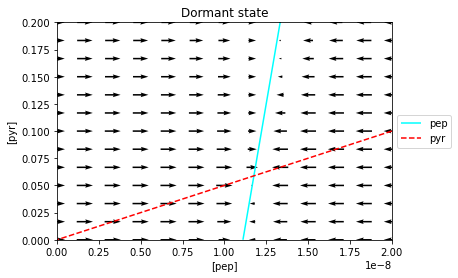

In [24]:
## Zooming in in the phase plane ##

#Adjust the limits of the phase portrait
xlim = (0,2*10**-8)
ylim = (0,0.2)

#Plot the phase portrait
pplane(ode2, pars = parameters, xlim = xlim, ylim = ylim)

#Add labels
plt.title("Dormant state")
plt.xlabel("[pep]")
plt.ylabel("[pyr]")

#Plot nullclines
nullclines(ode2, pars = parameters, xlim = xlim, ylim = ylim, labels = ['pep','pyr'])

#Adjust the position of the legend table
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
#Calculation of eigenvalues
a = -phi+r-1-d
b = phi
c = phi + r
d = -phi-d

matrix = np.array([[a, b], 
                  [c, d]])
eigenvalues = eig(matrix)[0]
print('Eigenvalues =', eigenvalues)

Eigenvalues = [-9.00000021e-01 -1.88888888e-08]


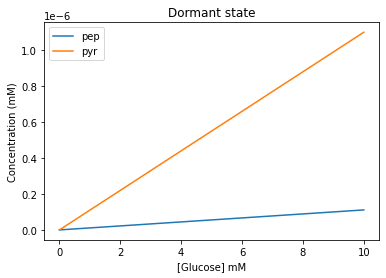

In [26]:
## Bifurcation plot ##

#Possible values of the parameter
glc = np.linspace(0,10,100)

#Add to a list the steady states of the variables for every value of the parameter
pep, pyr = [], []
for glc_value in glc:
    pep.append(bifurcation(parameters = (glc_value, phi, r, d), initial_conditions = (0,0))[0])
    pyr.append(bifurcation(parameters = (glc_value, phi, r, d), initial_conditions = (0,0))[1])

#Plot one variable against the other
plt.plot(glc, pep, label = "pep")
plt.plot(glc, pyr, label = "pyr")
plt.ylabel("Concentration (mM)")
plt.xlabel("[Glucose] mM")
plt.title("Dormant state")
plt.legend()
plt.show()

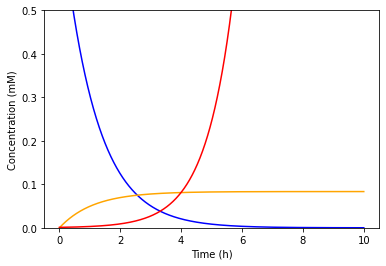

In [36]:
#Time-dependent glucose
solveODE_glc(parameters = parameters[1:4], initial_conditions = (0.75,0,0.001))